In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!unzip '/content/drive/My Drive/Colab Notebooks/NLMCXR_png.zip' -d '/content'

# Importing Libraries :

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
import pickle
from sklearn.model_selection import train_test_split
from nltk.translate.bleu_score import sentence_bleu
import warnings
warnings.filterwarnings('ignore')

# Reading Data :


In [4]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/preprocessed_data.csv')

In [5]:
df

,Frontal,Lateral,indication,findings,impression,count
0,CXR594_IM-2187-1001.png,CXR594_IM-2187-2001.png,pain weakness,there are t spine osteophytes there calcified ...,borderline cardiomegaly age indeterminate chro...,2
1,CXR532_IM-2140-1001.png,CXR532_IM-2140-2001.png,woman vehicle collision,the lungs are clear bilaterally specifically n...,no acute cardiopulmonary abnormality,2
2,CXR541_IM-2147-1001.png,CXR541_IM-2147-1001.png,chest pain,cardiomediastinal contour and pulmonary vascul...,no acute cardiopulmonary findings age indeterm...,1
3,CXR569_IM-2169-0001-0002.png,CXR569_IM-2169-0001-0001.png,rule out aspiration,the heart size and pulmonary vascularity appea...,continued elevation of the left hemidiaphragm ...,2
4,CXR581_IM-2178-1001.png,CXR581_IM-2178-3001.png,dyspnea asthma,frontal and lateral views of the chest show an...,no acute or active cardiac pulmonary or pleura...,2
...,...,...,...,...,...,...
4059,CXR885_IM-2399-2001.png,CXR885_IM-2399-2001.png,with ongoing shortness of breath and history o...,heart size mediastinal contour and pulmonary v...,no acute cardiopulmonary abnormality postsurgi...,1
4060,CXR88_IM-2394-2001.png,CXR88_IM-2394-2001.png,worsening dyspnea history of coronary artery d...,heart is mildly heart enlarged mediastinal con...,findings consistent with mild congestive heart...,1
4061,CXR900_IM-2408-2001.png,CXR900_IM-2408-2001.png,allogeneic bmt w u lab,the heart is normal in size the mediastinum is...,no acute disease,1
4062,CXR904_IM-2409-3003.png,CXR904_IM-2409-3003.png,painful chest,normal heart size left chest tip mid svc right...,stable appearance of the chest no or acute fin...,1


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
import tensorflow as tf
from tqdm import tqdm

# Image Augmentation:

In [15]:
# create image data augmentation generator
datagen = ImageDataGenerator(
        #zoom_range = 0.25, 
        brightness_range=[0.4,1.0],
        shear_range = 16, #[-16,16]
        rotation_range=15)
        #width_shift_range=0.15,  
        #height_shift_range=0.15,  
        #horizontal_flip = True )

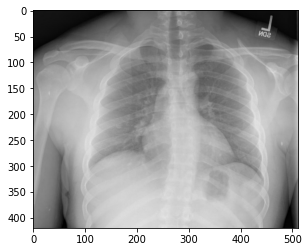

In [16]:
import matplotlib.image as mpimg
img = mpimg.imread('/content/NLMCXR_png/CXR3559_IM-1744-1001.png')
imgplot = plt.imshow(img)
plt.show()

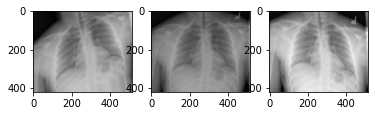

In [17]:
# load the image
img = load_img('/content/NLMCXR_png/CXR3559_IM-1744-1001.png')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
#datagen = ImageDataGenerator(width_shift_range=[-200,200])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(3):
	# define subplot
	pyplot.subplot(130 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	#tf.keras.preprocessing.image.save_img('/content/drive/My Drive/CXR3559_IM-1744-1001_1.png', image)
	pyplot.imshow(image)
# show the figure
pyplot.show()

In [18]:
image_id = []
for i,j in zip(df['Frontal'].values, df['Lateral'].values):
  image_id.append(i)
  image_id.append(j)
image_id = set(image_id)
image_id = list(image_id)# getting list of all unique images

In [19]:
for i in tqdm(image_id) :
  # load the image
  img = load_img('/content/NLMCXR_png/'+ i)
  # convert to numpy array
  data = img_to_array(img)
  # expand dimension to one sample
  samples = expand_dims(data, 0)
  # prepare iterator
  it = datagen.flow(samples, batch_size=1)
  for q in range(1,4):
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    tf.keras.preprocessing.image.save_img('/content/NLMCXR_png/'+i[:-4]+'_'+str(q)+'.png', image)  

100%|██████████| 7438/7438 [45:21<00:00,  2.73it/s]


In [20]:
add_list = []
for i in df['impression'] :
  add_list.append('<start> ' + i + ' <end>')# adding start and end to sentence
df['impression'] = add_list

In [21]:
y = df['impression']
X = df.drop(['impression'],axis = 1)
X_train,X_cv,y_train,y_cv = train_test_split(X,y,test_size = 0.3,stratify = df['count'],random_state = 10)

In [22]:
X_train

,Frontal,Lateral,indication,findings,count
2499,CXR2231_IM-0831-2001.png,CXR2231_IM-0831-1001.png,dyspnea,heart mediastinum bony structures are unremark...,3
1130,CXR3559_IM-1744-1001.png,CXR3559_IM-1744-2001.png,no indication,heart size within normal limits negative for f...,2
3336,CXR1432_IM-0278-1001.png,CXR1432_IM-0278-2001.png,copd,heart size and pulmonary vascularity appear wi...,2
1942,CXR2653_IM-1137-1001.png,CXR2653_IM-1137-2001.png,with chest pain,heart size and mediastinal contours appear wit...,2
2963,CXR1974_IM-0633-1001.png,CXR1974_IM-0633-2001.png,chest pain,the lungs are clear the cardiomediastinal silh...,2
...,...,...,...,...,...
2105,CXR2730_IM-1189-1001.png,CXR2730_IM-1189-2001.png,chest pain shortness of breath dizziness,heart size and pulmonary vascular engorgement ...,2
2442,CXR2261_IM-0852-1001.png,CXR2261_IM-0852-2001.png,chest pain today,frontal and lateral views of the chest with ov...,2
3036,CXR1937_IM-0607-1001.png,CXR1937_IM-0607-2001.png,tobacco use pre op evaluation,heart size and pulmonary vascularity appear wi...,2
2596,CXR2408_IM-0955-4004.png,CXR2408_IM-0955-2001.png,no indication,cardiomediastinal contour stable and within no...,2


In [ ]:
#X_test['count'].value_counts()

In [23]:
X_train = X_train.drop(['indication','findings','count'],axis = 1)
X_cv = X_cv.drop(['indication','findings','count'],axis = 1)

In [24]:
X_train

,Frontal,Lateral
2499,CXR2231_IM-0831-2001.png,CXR2231_IM-0831-1001.png
1130,CXR3559_IM-1744-1001.png,CXR3559_IM-1744-2001.png
3336,CXR1432_IM-0278-1001.png,CXR1432_IM-0278-2001.png
1942,CXR2653_IM-1137-1001.png,CXR2653_IM-1137-2001.png
2963,CXR1974_IM-0633-1001.png,CXR1974_IM-0633-2001.png
...,...,...
2105,CXR2730_IM-1189-1001.png,CXR2730_IM-1189-2001.png
2442,CXR2261_IM-0852-1001.png,CXR2261_IM-0852-2001.png
3036,CXR1937_IM-0607-1001.png,CXR1937_IM-0607-2001.png
2596,CXR2408_IM-0955-4004.png,CXR2408_IM-0955-2001.png


In [25]:
columns = ['Frontal','Lateral']
for i,j,z in zip(X_train['Frontal'],X_train['Lateral'],y_train) :
  for k in range(1,4) :
    #print(i[:-4]+'_'+str(k)+'.png')
    X_train = X_train.append(pd.Series([i[:-4]+'_'+str(k)+'.png', j[:-4]+'_'+str(k)+'.png'], index = columns), ignore_index = True)
    y_train = y_train.append(pd.Series([z],index = ['impression']),ignore_index=True)
  

In [26]:
X_train

,Frontal,Lateral
0,CXR2231_IM-0831-2001.png,CXR2231_IM-0831-1001.png
1,CXR3559_IM-1744-1001.png,CXR3559_IM-1744-2001.png
2,CXR1432_IM-0278-1001.png,CXR1432_IM-0278-2001.png
3,CXR2653_IM-1137-1001.png,CXR2653_IM-1137-2001.png
4,CXR1974_IM-0633-1001.png,CXR1974_IM-0633-2001.png
...,...,...
11371,CXR2408_IM-0955-4004_2.png,CXR2408_IM-0955-2001_2.png
11372,CXR2408_IM-0955-4004_3.png,CXR2408_IM-0955-2001_3.png
11373,CXR1040_IM-0032-4004_1.png,CXR1040_IM-0032-2001_1.png
11374,CXR1040_IM-0032-4004_2.png,CXR1040_IM-0032-2001_2.png


In [27]:
print(X_train.shape,X_cv.shape)

(11376, 2) (1220, 2)


# Tokenization of captions:

In [28]:
def max_length1(K) :
  'finding maximum length in documents'
  l = []
  for i in K :
    num = 0
    for j in i.split(" ") :
      num += 1
    l.append(num)
  return max(l)
length = max_length1(y_train)
max_doc_length_x = length
print(length)

125


In [29]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(filters="")#oov_token="<unknown>",
tokenizer.fit_on_texts(y_train)

tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'

vocab_size = len(tokenizer.word_index) + 1
print('Max document length: %d' % length)
print('Vocabulary size: %d' % vocab_size)
imp_vocab_size = vocab_size

encoded = tokenizer.texts_to_sequences(y_train)
enc_train_in = pad_sequences(encoded, maxlen=length, padding='post', truncating='post')

encoded2 = tokenizer.texts_to_sequences(y_cv)
enc_val_in = pad_sequences(encoded2, maxlen=length, padding='post', truncating='post')

enc_train_in = np.array(enc_train_in)
enc_val_in   = np.array(enc_val_in)


Max document length: 125
Vocabulary size: 1291


In [30]:
enc_train_in[4]

array([ 1, 56, 18,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0], dtype=int32)

In [31]:
print(list(tokenizer.word_index.items())[:5])

[('<start>', 1), ('<end>', 2), ('no', 3), ('acute', 4), ('cardiopulmonary', 5)]


In [32]:
enc_train_in.shape,enc_val_in.shape

((11376, 125), (1220, 125))

In [33]:
f = open('/content/drive/My Drive/Colab Notebooks/glove_vectors','rb') # 300d glove vectors  
glove_vectors = pickle.load(f)
f.close()

In [34]:
vocab_size = len(tokenizer.word_index.keys()) 

embedding_matrix = np.zeros((vocab_size,300))
for word, i in tokenizer.word_index.items():
    if word in glove_vectors.keys():
        vec = glove_vectors[word]
        embedding_matrix[i] = vec
    else:
        continue

In [35]:
import tensorflow as tf


In [36]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [37]:
import tensorflow as tf
#from tensorflow.keras.applications import EfficientNetB7,preprocess_input
from tensorflow.keras.applications.efficientnet import EfficientNetB7,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tqdm import tqdm
from tensorflow.keras.layers import Input,Dense,LSTM,Embedding,Concatenate
#tf.enable_eager_execution()


# Extract Features from Image

In [38]:
model_image = EfficientNetB7(include_top=False, weights='imagenet',classifier_activation='softmax', pooling='avg')
effiencient_in_layer = model_image.input
efficient_out_layer = model_image.layers[-1].output
features_image_model = Model(effiencient_in_layer, efficient_out_layer)

258080768/258076736 [==============================] - 10s 0us/step


In [43]:
image_id = []
for i,j in zip(df['Frontal'].values, df['Lateral'].values):
  image_id.append(i)
  image_id.append(j)
for i,j in zip(X_train['Frontal'].values, X_train['Lateral'].values):
  image_id.append(i)
  image_id.append(j)

image_id = set(image_id)
image_id = list(image_id)# getting list of all unique images

In [44]:
len(image_id)

23176

In [ ]:
tensor_image = []
for id in tqdm(image_id) :
    image_vec = tf.io.read_file('/content/NLMCXR_png/' + str(id))#reading image
    image_vec = tf.image.decode_jpeg(image_vec, channels=3)
    image_vec = tf.image.resize(image_vec, (299, 299))
    image_vec = preprocess_input(image_vec)
    
    features_of_image = features_image_model(tf.constant(image_vec)[None, :])

    features_of_image = tf.reshape(features_of_image,
                              (-1, features_of_image.shape[1]))
    
    tensor_image.append(features_of_image)# getting tensor of an image
    

In [ ]:
# save the file for future use
f = open('/content/drive/My Drive/Colab Notebooks/Image_features_new.pickle','wb')
#pickle.dump(tensor_image, f)
f.close()

# Loading Pickle file of image features:

In [45]:
f = open('/content/drive/My Drive/Colab Notebooks/Image_features_new.pickle','rb') # contains the features from chexNet
tensor_image = pickle.load(f)
f.close()

In [46]:
tensor_image[0].shape

TensorShape([1, 2560])

In [47]:
def tensor_conversion(image_vec, txt):
    return tf.convert_to_tensor([tensor_image[image_id.index(image_vec[0].decode('utf-8'))], tensor_image[image_id.index(image_vec[1].decode('utf-8'))]]), txt

### Create dataset for train and validation

In [48]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, enc_train_in))

# Use map to load the numpy files in parallel
train_dataset = train_dataset.map(lambda t1, t2: tf.numpy_function(
          tensor_conversion, [t1, t2], [tf.float32, tf.int32]),
          num_parallel_calls=tf.data.experimental.AUTOTUNE)

val_dataset = tf.data.Dataset.from_tensor_slices((X_cv, enc_val_in))

# Use map to load the numpy files in parallel
val_dataset = val_dataset.map(lambda t1, t2: tf.numpy_function(
          tensor_conversion, [t1, t2], [tf.float32, tf.int32]),
          num_parallel_calls=tf.data.experimental.AUTOTUNE)


In [49]:
for i,j in train_dataset :
  #print("Image1 & 2 tensor :\n",i)
  print("\ntext vector : ",j)
  break;


text vector :  tf.Tensor(
[  1 141 593 116  67  30  11 352  84 129 102   7  24   2   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0], shape=(125,), dtype=int32)


In [50]:
BATCH_SIZE = 16 #specify batch size
BUFFER_SIZE = 1000
embedding_dim = 300
units = 128

In [51]:
# Shuffle and batch
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
# Shuffle and batch
val_dataset = val_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
val_dataset = val_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [52]:
for i,j in train_dataset :
  #print("Image1 & 2 tensor :\n",i)
  print("\ntext vector : ",j)
  break;


text vector :  tf.Tensor(
[[ 1  3  4 ...  0  0  0]
 [ 1  3 23 ...  0  0  0]
 [ 1  3  4 ...  0  0  0]
 ...
 [ 1 35 44 ...  0  0  0]
 [ 1  3  4 ...  0  0  0]
 [ 1  3  4 ...  0  0  0]], shape=(16, 125), dtype=int32)


# Attention based Encoder_Decoder Model :

In [53]:
class Encoder(tf.keras.Model):
    def __init__(self, embedding_dim):
        super(Encoder, self).__init__()
        self.fc = Dense(embedding_dim, kernel_initializer=tf.keras.initializers.glorot_uniform(seed=45),
                  name="encoder_output_layer")

    def call(self, x):
        x = tf.reshape(x, [x.shape[0], x.shape[1], x.shape[3]])

        encoder_concat = Concatenate()([x[:,0], x[:,1]])
        x = self.fc(encoder_concat)
        x = tf.nn.relu(x)
        return x

In [54]:
class BahdanauAttention(tf.keras.Model):
  def __init__(self, units):
    super(BahdanauAttention, self).__init__()
    self.W1 = tf.keras.layers.Dense(units)
    self.W2 = tf.keras.layers.Dense(units)
    self.V = tf.keras.layers.Dense(1)

  def call(self, features, hidden):
    # features(CNN_encoder output) shape == (batch_size, 64, embedding_dim)

    # hidden shape == (batch_size, hidden_size)
    # hidden_with_time_axis shape == (batch_size, 1, hidden_size)
    hidden_with_time_axis = tf.expand_dims(hidden, 1)

    # score shape == (batch_size, 64, hidden_size)
    score = tf.nn.tanh(self.W1(features) + self.W2(hidden_with_time_axis))

    # attention_weights shape == (batch_size, 64, 1)
    # you get 1 at the last axis because you are applying score to self.V
    attention_weights = tf.nn.softmax(self.V(score), axis=1)

    # context_vector shape after sum == (batch_size, hidden_size)
    context_vector = attention_weights * features
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector, attention_weights

In [55]:
class Decoder(tf.keras.Model):
    def __init__(self, embedding_dim, units, vocab_size):
        super(Decoder, self).__init__()
        self.units = units
        self.embedding = Embedding(vocab_size, output_dim=300, mask_zero=True,weights = [embedding_matrix])
        self.lstm = LSTM(self.units,activation='tanh',recurrent_activation='sigmoid', use_bias=True,
                         return_sequences=True,return_state=True,
                                       recurrent_initializer=tf.keras.initializers.glorot_uniform(seed=45))
        self.dense1 = Dense(units, kernel_initializer=tf.keras.initializers.glorot_uniform(seed=45))
        self.dense2 = Dense(vocab_size, kernel_initializer=tf.keras.initializers.glorot_uniform(seed=45))
        self.attention = BahdanauAttention(self.units)

    def call(self, x, features, hidden):
        context_vector, attention_weights = self.attention(features, hidden)

        x1 = self.embedding(x)
      
        x1 = tf.concat([x1, tf.expand_dims(context_vector,1)], axis=-1)
        #mask = self.embedding.compute_mask(x1)
        output, state, _ = self.lstm(x1)#,mask=mask
        x1 = self.dense1(output)
        x1 = tf.reshape(x1, (-1, x1.shape[2]))
        x1 = self.dense2(output)
        return x1,state
    def reset_state(self, batch_size):
        return tf.zeros((batch_size, self.units))

## Model Architecture :

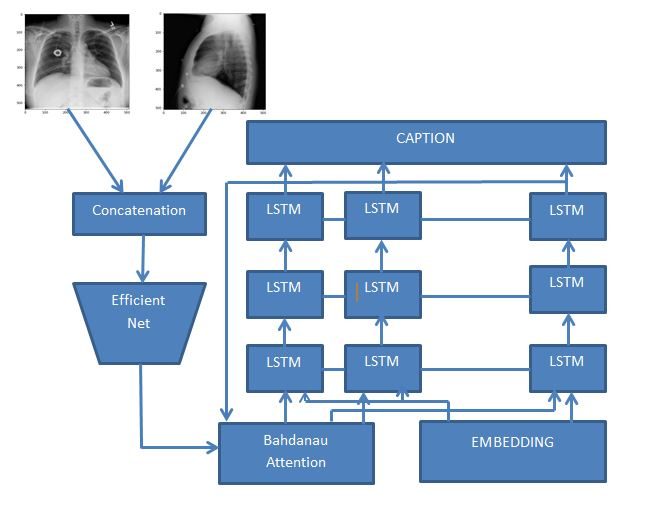

In [1]:
from IPython.display import Image
Image("architecture.JPG")

In [56]:
optimizer = tf.keras.optimizers.Adam(0.001)
object_loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')

object_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

def loss_function(actual, pred):
    mask = tf.math.logical_not(tf.math.equal(actual, 0))
    loss_value = object_loss(actual, pred)
    mask = tf.cast(mask, dtype=loss_value.dtype)
    loss_value = loss_value*mask
    #print("mask",tf.reduce_sum(mask))
    return tf.reduce_mean(loss_value) #tf.reduce_sum(loss_value)/tf.reduce_sum(mask) #


In [57]:
!rm -r /content/logs/

rm: cannot remove '/content/logs/': No such file or directory


In [58]:
import datetime
train_log_dir = '/content/logs/gradient_tape/' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + '/train'
val_log_dir = '/content/logs/gradient_tape/' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + '/val'
train_writer_summary = tf.summary.create_file_writer(train_log_dir)
val_writer_summary = tf.summary.create_file_writer(val_log_dir)

In [59]:
encoder = Encoder(embedding_dim)
decoder = Decoder(embedding_dim, units, vocab_size)

In [60]:
#tf.config.experimental_run_functions_eagerly(False)
@tf.function
#https://stackoverflow.com/questions/55063120/can-anyone-give-a-tiny-example-to-explain-the-params-of-tf-random-categorical
#https://www.tensorflow.org/tutorials/text/image_captioning
def train_step(tensor, target):
    #Initialize
    train_loss = 0
    hidden = decoder.reset_state(batch_size=target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    with tf.GradientTape() as tape:

        img_features = encoder(tensor)
        for i in range(1, target.shape[1]):
            
            predictions,hidden = decoder(dec_input, img_features,hidden)
            
            #[32,1,1345]

            train_loss += loss_function(target[:, i], predictions)

            # using teacher forcing
            dec_input = tf.expand_dims(target[:, i],1)
            
    #total_train_loss = (train_loss / int(target.shape[1]))

    trainable_variables = encoder.trainable_variables + decoder.trainable_variables

    gradients = tape.gradient(train_loss, trainable_variables)


    #optimizer.apply_gradients(zip(gradients, trainable_variables))
    optimizer.apply_gradients([(grad, var) for (grad, var) in zip(gradients, trainable_variables) if grad is not None])
 
    return train_loss

#validation function
@tf.function
def val_step(tensor, target):
    val_loss_ = 0  
    hidden = decoder.reset_state(batch_size=target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    
    with tf.GradientTape() as tape:
        features = encoder(tensor)
        #(batch_size,embedding_dim)
        for i in range(1, target.shape[1]):
            # passing the features through the decoder
            predictions_val,hidden = decoder(dec_input, features,hidden)
            val_loss_ += loss_function(target[:, i], predictions_val)

            # using teacher forcing
            dec_input = tf.expand_dims(target[:, i],1)


    return val_loss_

# Training Model :

In [61]:

tf.keras.backend.clear_session()
EPOCHS = 15
for epoch in range(0, EPOCHS):
    start = time.time()
    total_train_loss = 0
    total_val_loss = 0
    #print('Batchwise Train loss')
    for (batch, (tensor_png, target)) in enumerate(train_dataset):
        
        tr_loss = train_step(tensor_png, target)
        total_train_loss += tr_loss
        #if batch % 40 == 0:
           # print ('Epoch {} Batch {}  Loss {:.4f}  bleu1 {:.5f} bleu2 {:.5f} bleu3 {:.5f} bleu4 {:.5f}'.format(
              #epoch + 1, batch, tr_loss,  b1,b2,b3,b4))

    with train_writer_summary.as_default():
        tf.summary.scalar('loss', total_train_loss/ int(len(X_train) // BATCH_SIZE), step=epoch)

    #print('Batchwise validation loss') 
    for (batch, (tensor_png, target)) in enumerate(val_dataset):
        tr_loss_val = val_step(tensor_png, target)
        total_val_loss += tr_loss_val

        #if batch % 50 == 0:
            #print ('Epoch {} Batch {}  Loss {:.4f} bleu1 {:.5f} bleu2 {:.5f} bleu3 {:.5f} bleu4 {:.5f}'.format(
             # epoch + 1, batch,tr_loss_val,  b1,b2,b3,b4))

    with val_writer_summary.as_default():
        tf.summary.scalar('loss', total_val_loss/int(len(X_cv) // BATCH_SIZE), step=epoch)

    template = '\nEpoch {}, Train Loss: {:.4f} Val_Loss: {:.4f} '
    print(template.format(epoch+1,
                            total_train_loss/ int(len(X_train) // BATCH_SIZE),total_val_loss/ int(len(X_cv) // BATCH_SIZE)) )

    
    #Val Loss: {:.4f}, Val Bleu : {:.4f}
    print('Time Taken for this Epoch : {} sec'.format(time.time()-start))


Epoch 1, Train Loss: 29.0119 Val_Loss: 22.4641 
Time Taken for this Epoch : 856.1113004684448 sec

Epoch 2, Train Loss: 17.9317 Val_Loss: 17.9123 
Time Taken for this Epoch : 541.8617343902588 sec

Epoch 3, Train Loss: 15.2390 Val_Loss: 16.4824 
Time Taken for this Epoch : 539.0586295127869 sec

Epoch 4, Train Loss: 14.0679 Val_Loss: 16.3340 
Time Taken for this Epoch : 539.5394866466522 sec

Epoch 5, Train Loss: 13.3152 Val_Loss: 15.9970 
Time Taken for this Epoch : 540.5513098239899 sec

Epoch 6, Train Loss: 12.8039 Val_Loss: 15.8753 
Time Taken for this Epoch : 538.5309777259827 sec

Epoch 7, Train Loss: 12.3617 Val_Loss: 16.2727 
Time Taken for this Epoch : 535.0350611209869 sec

Epoch 8, Train Loss: 12.0963 Val_Loss: 16.3408 
Time Taken for this Epoch : 539.1338477134705 sec

Epoch 9, Train Loss: 11.7719 Val_Loss: 16.0253 
Time Taken for this Epoch : 526.344162940979 sec

Epoch 10, Train Loss: 11.6237 Val_Loss: 16.2552 
Time Taken for this Epoch : 520.6506383419037 sec

Epoch 11,

In [62]:
%load_ext tensorboard

In [ ]:
#tensorboard --logdir='/content/logs/gradient_tape/20200921-164112'

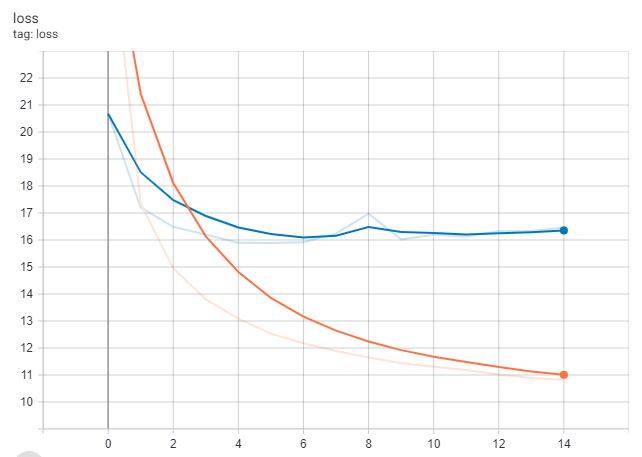

In [62]:
from IPython.display import Image
Image("/content/drive/My Drive/Colab Notebooks/kk2.JPG")

# Predictions :

In [64]:
def convert_to_tensor_ofimage(image_path,  model_image):
    image_vec = tf.io.read_file(image_path)
    image_vec = tf.image.decode_jpeg(image_vec, channels=3)
    image_vec = tf.image.resize(image_vec, (299, 299))
    image_vec = preprocess_input(image_vec)
    features_image = features_image_model(tf.constant(image_vec)[None, :])
    return features_image

# Greedy search:

In [65]:
def evaluate(im_id):
    img_tensor = tf.convert_to_tensor([convert_to_tensor_ofimage("/content/NLMCXR_png/" + im_id[0], features_image_model), 
                                      convert_to_tensor_ofimage("/content/NLMCXR_png/" + im_id[1], features_image_model)])# convert image list to tensor
    img_features = tf.constant(img_tensor)[None, :]
    features_val = encoder(img_features)
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 1)
    hidden = decoder.reset_state(batch_size=1)
    result = []
    text = ""
    for i in range(max_doc_length_x):

        predictions,hidden = decoder(dec_input, features_val,hidden)
        predictions = tf.reshape(predictions, [predictions.shape[0],predictions.shape[2]])
        predicted_id = tf.argmax(predictions, axis=1)[0].numpy()
        if predicted_id != 0 :
          result.append(tokenizer.index_word[predicted_id])
          text += " " + tokenizer.index_word[predicted_id]
        if tokenizer.index_word[predicted_id] == '<end>':
            return result, text.replace("<end>","")

        dec_input = tf.expand_dims([predicted_id], 1)
    return result, text

In [66]:

import matplotlib.image as mpimg
def Prediction_on_test(two_images):
    result, text = evaluate(two_images)
    """Prediction on test images """
    fig, axs = plt.subplots(1, len(two_images), figsize = (10,10), tight_layout=True)
    i = 0
    for each_img, subplot in zip(two_images, axs.flatten()):
        each_img1=mpimg.imread("/content/NLMCXR_png/"+each_img)
        imgplot = axs[i].imshow(each_img1, cmap = 'bone')
        i +=1
    plt.show()
    print("Predicted:",text)

# BEAM SEARCH :

In [86]:
#https://machinelearningmastery.com/calculate-bleu-score-for-text-python/#:~:text=The%20cumulative%20and%20individual%201,2%20and%203%2Dgram%20scores.&text=They%20are%20quite%20different%20and,standalone%20individual%20n%2Dgram%20scores.
#https://www.youtube.com/watch?v=RLWuzLLSIgw

def calculate_score(x):
    """Calculates the cumulative score for the length of sentence"""
    return x[1]/len(x[0])

def beam_search(im_id, beam_width = 3):
    """Beam search implementaion takes images as input"""
    hidden =  tf.zeros((1, units))
    img_tensor = tf.convert_to_tensor([convert_to_tensor_ofimage("/content/NLMCXR_png/" + im_id[0], features_image_model), 
                                      convert_to_tensor_ofimage("/content/NLMCXR_png/"+ im_id[1], features_image_model)])
    image_features = tf.constant(img_tensor)[None, :]
    features_val = encoder(image_features)
    start = [tokenizer.word_index["<start>"]]
    caption = [[start, 0.0]]
    while len(caption[0][0]) < max_doc_length_x:
        temp = []
        for s in caption:
            
            predictions, hidden = decoder(tf.cast(tf.expand_dims([s[0][-1]], 0), tf.float32), features_val, hidden)
            predictions = tf.reshape(predictions, [predictions.shape[0],predictions.shape[2]])
            word_preds = np.argsort(predictions[0])[-beam_width:]
            # Getting the top <beam_width>(n) predictions and creating a 
            # new list so as to put them via the model again
            for w in word_preds:
                next_cap, prob = s[0][:], s[1]
                next_cap.append(w)
                prob += predictions[0][w]
                temp.append([next_cap, prob.numpy()])
        caption = temp
        # Sorting according to the probabilities scores
        caption = sorted(caption, reverse=False, key=calculate_score)
        # Getting the top words
        caption = caption[-beam_width:]
    caption = caption[-1][0]
    impression = [tokenizer.index_word[i] for i in caption if i !=0]
    result = []
    count = 0
    for i in impression:
        count += 1     
        if i != '<end>':
          if count < 15 :
            result.append(i)
        else:
            break
    
    text = ' '.join(result[1:])
    return result, text

In [94]:

def beam_predictions(img_data, actual_text, width):
    result, text = beam_search(img_data, beam_width = width)
    """Displays images for given input array of image names"""
    fig, axs = plt.subplots(1, len(img_data), figsize = (10,10), tight_layout=True)
    count = 0
    for img, subplot in zip(img_data, axs.flatten()):
        img_=mpimg.imread("/content/NLMCXR_png/"+img)
        imgplot = axs[count].imshow(img_, cmap = 'bone')
        count +=1
    plt.show()
    reference = [actual_text.split()[1:-1]]
    result = result[1:]
    #print("result",result)
    print("Beam Search, Beam width=", width)
    print("="*50)
    actual_text = actual_text.replace("<start>","")
    actual_text = actual_text.replace("<end>","")
    print("Actual", actual_text)
    print("Predicted:",text)
    print("="*50)
    print('Individual 1-gram: {:.4f} Cumulative 1-gram: {:.4f}'.format(sentence_bleu(reference, result, weights=(1, 0, 0, 0)), sentence_bleu(reference, result, weights=(1, 0, 0, 0))))
    print('Individual 2-gram: {:.4f} Cumulative 2-gram: {:.4f}'.format(sentence_bleu(reference, result, weights=(0, 1, 0, 0)), sentence_bleu(reference, result, weights=(0.5, 0.5, 0, 0))))
    print('Individual 3-gram: {:.4f} Cumulative 3-gram: {:.4f}'.format(sentence_bleu(reference, result, weights=(0, 0, 1, 0)), sentence_bleu(reference, result, weights=(0.33, 0.33, 0.33, 0))))
    print('Individual 4-gram: {:.4f} Cumulative 4-gram: {:.4f}'.format(sentence_bleu(reference, result, weights=(0, 0, 0, 1)), sentence_bleu(reference, result, weights=(0.25, 0.25, 0.25, 0.25))))

In [95]:
y_cv.index[0:20]

Int64Index([3697, 1854,  478, 3331, 1705,  702, 2317, 3460, 2131, 2988,  150,
            2729, 1870, 3669, 3801,  710, 3450, 2594, 1109,  419],
           dtype='int64')

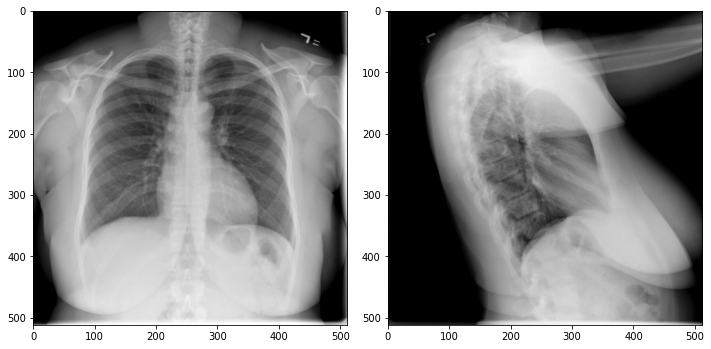

Beam Search, Beam width= 3
Actual  no acute cardiopulmonary abnormality 
Predicted: no acute cardiopulmonary process
Individual 1-gram: 0.7500 Cumulative 1-gram: 0.7500
Individual 2-gram: 0.6667 Cumulative 2-gram: 0.7071
Individual 3-gram: 0.5000 Cumulative 3-gram: 0.6329
Individual 4-gram: 1.0000 Cumulative 4-gram: 0.7071


In [96]:
beam_predictions(X_cv.loc[3697],y_cv.loc[3697],3)
#print("Actual: ",y_cv.loc[67])

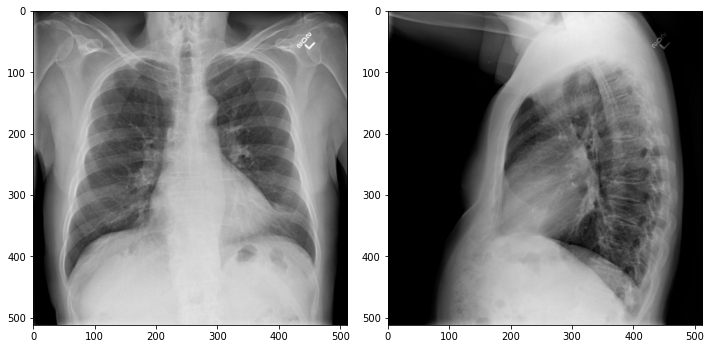

Beam Search, Beam width= 3
Actual  no acute process 
Predicted: no pneumothorax measuring x cm in the right pleural effusions constellation findings may
Individual 1-gram: 0.0769 Cumulative 1-gram: 0.0769
Individual 2-gram: 1.0000 Cumulative 2-gram: 0.2774
Individual 3-gram: 1.0000 Cumulative 3-gram: 0.4289
Individual 4-gram: 1.0000 Cumulative 4-gram: 0.5266


In [97]:
beam_predictions(X_cv.loc[478],y_cv.loc[478],3)

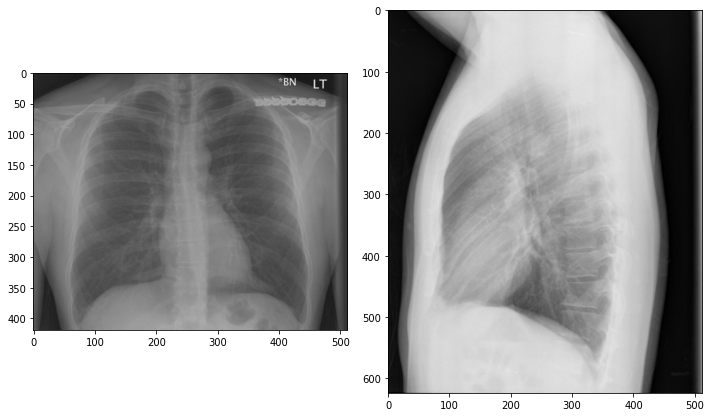

Beam Search, Beam width= 3
Actual  no acute radiographic cardiopulmonary process 
Predicted: no acute cardiopulmonary process
Individual 1-gram: 0.7788 Cumulative 1-gram: 0.7788
Individual 2-gram: 0.5192 Cumulative 2-gram: 0.6359
Individual 3-gram: 0.7788 Cumulative 3-gram: 0.6813
Individual 4-gram: 0.7788 Cumulative 4-gram: 0.7037


In [99]:
beam_predictions(X_cv.loc[419],y_cv.loc[419],3)

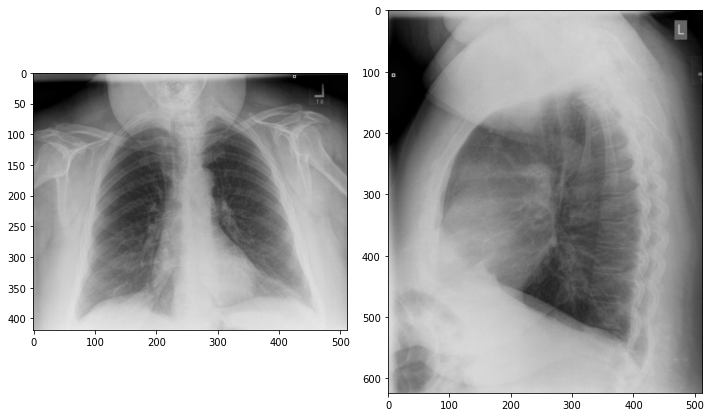

Beam Search, Beam width= 3
Actual  no acute disease 
Predicted: no pneumothorax measuring x cm in the right upper limits of the right
Individual 1-gram: 0.0769 Cumulative 1-gram: 0.0769
Individual 2-gram: 1.0000 Cumulative 2-gram: 0.2774
Individual 3-gram: 1.0000 Cumulative 3-gram: 0.4289
Individual 4-gram: 1.0000 Cumulative 4-gram: 0.5266


In [100]:
beam_predictions(X_cv.loc[1909],y_cv.loc[1909],3)

# BLEU SCORE :

In [105]:
bleu1 = []
bleu2 = []
bleu3 = []
bleu4 = []
predicted_caption = []
for two_images, actual_text in zip(X_cv.values, y_cv.values):
  
    actual_text = actual_text.split()[1:]
    actual_text = actual_text[:len(actual_text)-1]
    actual_text = ' '.join(i for i in actual_text)
    
    _,pred_text = evaluate(two_images)
    predicted_caption.append(pred_text)
    #print("\n",actual_text)
    #print(pred_text)
    bleu1.append(sentence_bleu([actual_text.split()], pred_text.split(), weights = (1,0,0,0)))
    bleu2.append(sentence_bleu([actual_text.split()], pred_text.split(), weights = (0.5,0.5,0,0)))
    bleu3.append(sentence_bleu([actual_text.split()], pred_text.split(), weights = (0.33,0.33,0.33,0)))
    bleu4.append(sentence_bleu([actual_text.split()], pred_text.split(), weights = (0.25,0.25,0.25,0.25)))
    

In [112]:
print('Bleu1 Score: ', sum(bleu1)/X_cv.shape[0])
print('Bleu2 Score: ', sum(bleu2)/X_cv.shape[0])
print('Bleu3 Score: ', sum(bleu3)/X_cv.shape[0])
print('Bleu4 Score: ', sum(bleu4)/X_cv.shape[0])

Bleu1 Score: 0.31539407019755621
Bleu2 Score: 0.31280761664097004
Bleu3 Score: 0.32511960818309501
Bleu4 Score: 0.36804421754697109


In [116]:
predicted_df = X_cv
val_y = []
for i in y_cv.values:
  i = i.replace("<start>","")
  i = i.replace("<end>","")
  val_y.append(i)
predicted_df["Actual"] = val_y
predicted_df["Predicted"] = predicted_caption

In [117]:
predicted_df

,Frontal,Lateral,Actual,Predicted
3697,CXR1009_IM-0010-1001.png,CXR1009_IM-0010-2001.png,no acute cardiopulmonary abnormality,no acute cardiopulmonary process
1854,CXR252_IM-1038-1001.png,CXR252_IM-1038-2001.png,no acute cardiopulmonary disease,no acute cardiopulmonary process
478,CXR3735_IM-1866-1001.png,CXR3735_IM-1866-2001.png,no acute process,no focal atelectasis
3331,CXR1369_IM-0238-1001.png,CXR1369_IM-0238-2001.png,unremarkable examination of the chest,no acute cardiopulmonary process
1705,CXR3231_IM-1528-1001.png,CXR3231_IM-1528-2001.png,no acute pulmonary abnormality abnormal appea...,no acute cardiopulmonary process
...,...,...,...,...
1794,CXR3342_IM-1603-1001.png,CXR3342_IM-1603-2001.png,persistent cardiomegaly and patchy bibasilar ...,no acute cardiopulmonary injury no acute card...
2315,CXR2174_IM-0787-1001.png,CXR2174_IM-0787-2001.png,unremarkable radiographs of the chest,no acute cardiopulmonary injury no acute card...
2394,CXR2229_IM-0831-1001.png,CXR2229_IM-0831-1002.png,no acute radiographic cardiopulmonary process,no acute cardiopulmonary process
233,CXR786_IM-2326-1001.png,CXR786_IM-2326-1001.png,small calcified granulomas in in right upper ...,findings


In [118]:
predicted_df.to_csv("/content/drive/My Drive/final_df.csv",index=False)